## Consumer Behavior and Banking Patterns in UPI Transactions

### Enviromental Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

### Data Loading

In [2]:
df = pd.read_excel("UPI transactions.xlsx")
df

,Date (dd/mm/yyyy),Time,Transaction (thousands),Sent From Bank,City,Age,Gender,Bank Received,Balance (thousands),Customer ID,Age Groups
0,2023-06-30,1:22:34,643.714122,Axis Bank,Mumbai,71,Male,Bank of India,484.504798,11,Senior Adult
1,2023-08-10,10:37:27,198.788436,Axis Bank,Hyderabad,83,Female,Bandhan Bank,981.841670,12,Senior Adult
2,2022-01-21,9:59:33,369.966567,Axis Bank,Mumbai,69,Male,ICICI,681.097801,22,Senior Adult
3,2023-09-11,2:47:45,288.951851,Axis Bank,Bangalore,78,Male,Bank of India,236.090819,10,Senior Adult
4,2023-07-14,6:43:18,698.746405,Axis Bank,Delhi,69,Male,Bandhan Bank,765.327698,17,Senior Adult
...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-05-09,6:9:57,267.617823,Union Bank,Delhi,17,Female,ICICI,896.352820,4,Teen
2996,2022-12-08,1:43:49,587.781140,KreditBee,Bangalore,17,Male,Bank of Baroda,590.202647,2,Teen
2997,2023-06-01,3:3:46,858.627031,KreditBee,Delhi,17,Female,ICICI,116.655068,20,Teen
2998,2023-01-17,1:27:33,666.802048,Union Bank,Mumbai,17,Male,Bank of Baroda,603.403235,2,Teen


### Data Understanding

In [3]:
df.shape

(3000, 11)

In [4]:
df.size

33000

In [5]:
df.head()

,Date (dd/mm/yyyy),Time,Transaction (thousands),Sent From Bank,City,Age,Gender,Bank Received,Balance (thousands),Customer ID,Age Groups
0,2023-06-30,1:22:34,643.714122,Axis Bank,Mumbai,71,Male,Bank of India,484.504798,11,Senior Adult
1,2023-08-10,10:37:27,198.788436,Axis Bank,Hyderabad,83,Female,Bandhan Bank,981.841670,12,Senior Adult
2,2022-01-21,9:59:33,369.966567,Axis Bank,Mumbai,69,Male,ICICI,681.097801,22,Senior Adult
3,2023-09-11,2:47:45,288.951851,Axis Bank,Bangalore,78,Male,Bank of India,236.090819,10,Senior Adult
4,2023-07-14,6:43:18,698.746405,Axis Bank,Delhi,69,Male,Bandhan Bank,765.327698,17,Senior Adult


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date (dd/mm/yyyy)        3000 non-null   datetime64[ns]
 1   Time                     3000 non-null   object        
 2   Transaction (thousands)  3000 non-null   float64       
 3   Sent From Bank           3000 non-null   object        
 4   City                     3000 non-null   object        
 5   Age                      3000 non-null   int64         
 6   Gender                   3000 non-null   object        
 7   Bank Received            3000 non-null   object        
 8   Balance (thousands)      3000 non-null   float64       
 9   Customer ID              3000 non-null   int64         
 10  Age Groups               3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 257.9+ KB


In [7]:
df.columns.tolist()

['Date (dd/mm/yyyy)',
 'Time',
 'Transaction (thousands)',
 'Sent From Bank',
 'City',
 'Age',
 'Gender',
 'Bank Received ',
 'Balance (thousands)',
 'Customer ID',
 'Age Groups']

In [8]:
# Returns the data type of each column in the DataFrame
df.dtypes

Date (dd/mm/yyyy)          datetime64[ns]
Time                               object
Transaction (thousands)           float64
Sent From Bank                     object
City                               object
Age                                 int64
Gender                             object
Bank Received                      object
Balance (thousands)               float64
Customer ID                         int64
Age Groups                         object
dtype: object

### Data Exploration

### Date

In [9]:
df["Date (dd/mm/yyyy)"].unique()

<DatetimeArray>
['2023-06-30 00:00:00', '2023-08-10 00:00:00', '2022-01-21 00:00:00',
 '2023-09-11 00:00:00', '2023-07-14 00:00:00', '2022-10-03 00:00:00',
 '2024-01-28 00:00:00', '2024-01-13 00:00:00', '2023-11-24 00:00:00',
 '2023-11-28 00:00:00',
 ...
 '2023-03-06 00:00:00', '2023-10-07 00:00:00', '2023-11-07 00:00:00',
 '2023-02-25 00:00:00', '2023-02-28 00:00:00', '2023-03-15 00:00:00',
 '2022-11-13 00:00:00', '2024-01-03 00:00:00', '2023-06-09 00:00:00',
 '2022-12-08 00:00:00']
Length: 749, dtype: datetime64[ns]

In [10]:
df["Date (dd/mm/yyyy)"].value_counts()

Date (dd/mm/yyyy)
2022-07-07    11
2022-05-21    10
2023-08-22    10
2022-08-18    10
2022-06-14    10
              ..
2022-12-01     1
2023-09-10     1
2022-11-15     1
2023-01-16     1
2022-12-08     1
Name: count, Length: 749, dtype: int64

### Time   

In [11]:
df["Time"].unique()

array(['1:22:34', '10:37:27', '9:59:33', ..., '3:3:46', '1:27:33',
       '11:51:3'], dtype=object)

In [12]:
df["Time"].value_counts()

Time
9:33:51    3
10:3:15    3
12:2:3     2
5:60:2     2
7:49:31    2
          ..
2:5:46     1
12:7:48    1
5:48:1     1
9:14:42    1
11:51:3    1
Name: count, Length: 2897, dtype: int64

### Transaction (thousands) 

In [13]:

df["Transaction (thousands)"].unique()

array([643.71412243, 198.78843565, 369.9665675 , ..., 858.62703052,
       666.80204755, 329.41912551])

In [14]:
df["Transaction (thousands)"].value_counts()

Transaction (thousands)
643.714122    1
733.088245    1
741.286633    1
107.453569    1
233.212337    1
             ..
487.084309    1
682.241297    1
931.437598    1
271.160532    1
329.419126    1
Name: count, Length: 3000, dtype: int64

### Sent From Bank  

In [15]:
df["Sent From Bank"].unique()

array(['Axis Bank', 'KreditBee', 'HDFC', 'Union Bank', 'ICICI'],
      dtype=object)

In [16]:
df["Sent From Bank"].value_counts()

Sent From Bank
ICICI         624
Union Bank    613
Axis Bank     599
HDFC          586
KreditBee     578
Name: count, dtype: int64

#### City

In [17]:
df["City"].unique()

array(['Mumbai', 'Hyderabad', 'Bangalore', 'Delhi', 'Chennai'],
      dtype=object)

In [18]:
df["City"].value_counts()

City
Bangalore    616
Hyderabad    615
Delhi        600
Chennai      597
Mumbai       572
Name: count, dtype: int64

### Age

In [19]:
df["Age"].unique()

array([71, 83, 69, 78, 64, 62, 82, 72, 76, 84, 65, 61, 68, 77, 79, 74, 73,
       81, 66, 80, 75, 67, 60, 63, 70, 21, 22, 19, 29, 36, 34, 28, 18, 38,
       27, 39, 30, 32, 25, 31, 23, 20, 37, 24, 35, 26, 33, 52, 58, 54, 44,
       46, 41, 59, 42, 45, 55, 40, 51, 49, 47, 48, 53, 56, 57, 43, 50, 17],
      dtype=int64)

In [20]:
df["Age"].value_counts()

Age
71    62
77    60
25    57
28    56
46    55
      ..
59    36
61    36
47    34
80    30
50    30
Name: count, Length: 68, dtype: int64

### Gender

In [21]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df["Gender"].value_counts()

Gender
Male      1514
Female    1486
Name: count, dtype: int64

### Bank Received	

In [23]:
df["Bank Received "].unique()

array(['Bank of India', 'Bandhan Bank', 'ICICI', 'Axis Bank', 'HDFC',
       'Union Bank', 'KreditBee', 'Bank of Baroda'], dtype=object)

In [24]:
df["Bank Received "].value_counts()

Bank Received 
HDFC              433
Axis Bank         400
Bandhan Bank      386
Bank of India     383
Union Bank        360
Bank of Baroda    349
ICICI             348
KreditBee         341
Name: count, dtype: int64

### Balance (thousands)

In [25]:
df["Balance (thousands)"].unique()

array([484.50479759, 981.84167013, 681.09780098, ..., 116.65506848,
       603.40323485, 646.86514058])

In [26]:
df["Balance (thousands)"].value_counts()

Balance (thousands)
484.504798    1
123.599812    1
489.715674    1
345.552751    1
740.753217    1
             ..
519.352753    1
607.459090    1
148.017134    1
532.825295    1
646.865141    1
Name: count, Length: 3000, dtype: int64

#### Customer ID

In [27]:
df["Customer ID"].unique()

array([11, 12, 22, 10, 17,  4,  6,  7, 21,  8, 20, 18, 15,  9, 19, 16, 13,
       14,  1,  3,  5,  2], dtype=int64)

### Age Groups

In [28]:
df["Age Groups"].unique()

array(['Senior Adult', 'Adult', 'Middle Age Adult', 'Teen'], dtype=object)

In [29]:
df["Age Groups"].value_counts()

Age Groups
Senior Adult        1109
Adult               1007
Middle Age Adult     844
Teen                  40
Name: count, dtype: int64

In [30]:
# Seprate the Continuous , discreste and time series variable

In [31]:
continuous_cols = ["Age","Transaction (thousands)","Balance (thousands)"]

In [32]:
discerete_cols =  ['Sent From Bank', 'City','Gender','Bank Received','Customer Id', 'Age Groups']

In [33]:
timeseries_cols = ["Date (dd/mm/yyyy)","Time"]

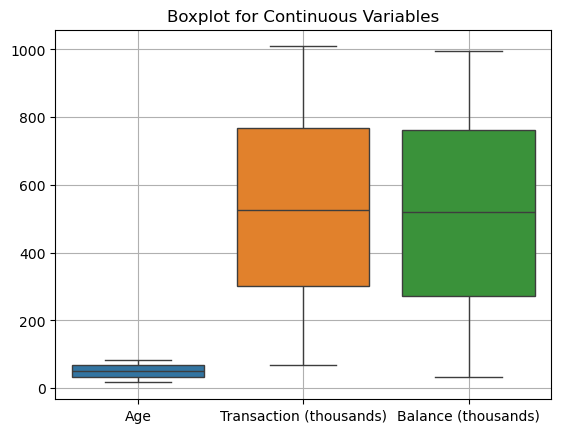

In [34]:
# for continuous column
continuous_cols = ["Age","Transaction (thousands)","Balance (thousands)"]

sns.boxplot(data=df[continuous_cols] )
plt.title("Boxplot for Continuous Variables")
plt.grid(True)
plt.show()

##### Based on the boxplot, Transaction and Balance amounts show a wide range with noticeable outliers, while Age is more tightly distributed, indicating more variability in financial metrics than in customer age.

  In this plot we observe that there is no outliers present in this datasets.

### Data Cleaning

In [35]:
df.columns

Index(['Date (dd/mm/yyyy)', 'Time', 'Transaction (thousands)',
       'Sent From Bank', 'City', 'Age', 'Gender', 'Bank Received ',
       'Balance (thousands)', 'Customer ID', 'Age Groups'],
      dtype='object')

In [36]:
# to check the duplicated record
df.duplicated().sum()

0

In [37]:
# Convert the 'Time' column from string to datetime
#df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [38]:
df['Hour'] = df['Time'].astype(str).str.split(':').str[0].astype(int)

In [39]:
df.isnull().sum()

Date (dd/mm/yyyy)          0
Time                       0
Transaction (thousands)    0
Sent From Bank             0
City                       0
Age                        0
Gender                     0
Bank Received              0
Balance (thousands)        0
Customer ID                0
Age Groups                 0
Hour                       0
dtype: int64

In [40]:
# Check if there are any missing values in the entire DataFrame
print(df.isnull().values.any())


False


In [41]:
# fill the missing values using mode
df['Time'].fillna(df['Time'].mode()[0], inplace=True)

In [42]:
df.isnull().sum()

Date (dd/mm/yyyy)          0
Time                       0
Transaction (thousands)    0
Sent From Bank             0
City                       0
Age                        0
Gender                     0
Bank Received              0
Balance (thousands)        0
Customer ID                0
Age Groups                 0
Hour                       0
dtype: int64

In [43]:
# rename the column whose name is currently "Date (dd/mm/yyyy)" to just "Date".
df.rename(columns={'Date (dd/mm/yyyy)': 'Date'}, inplace=True)

In [44]:
# rename the column whose name is currently "Transaction (thousands)" to just "Transaction".
df.rename(columns={'Transaction (thousands)': 'Transaction'}, inplace=True)

In [45]:
# rename the column whose name is currently "Balance (thousands)" to just "Balance".
df.rename(columns={'Balance (thousands)': 'Balance'}, inplace=True)

### Data Analysis

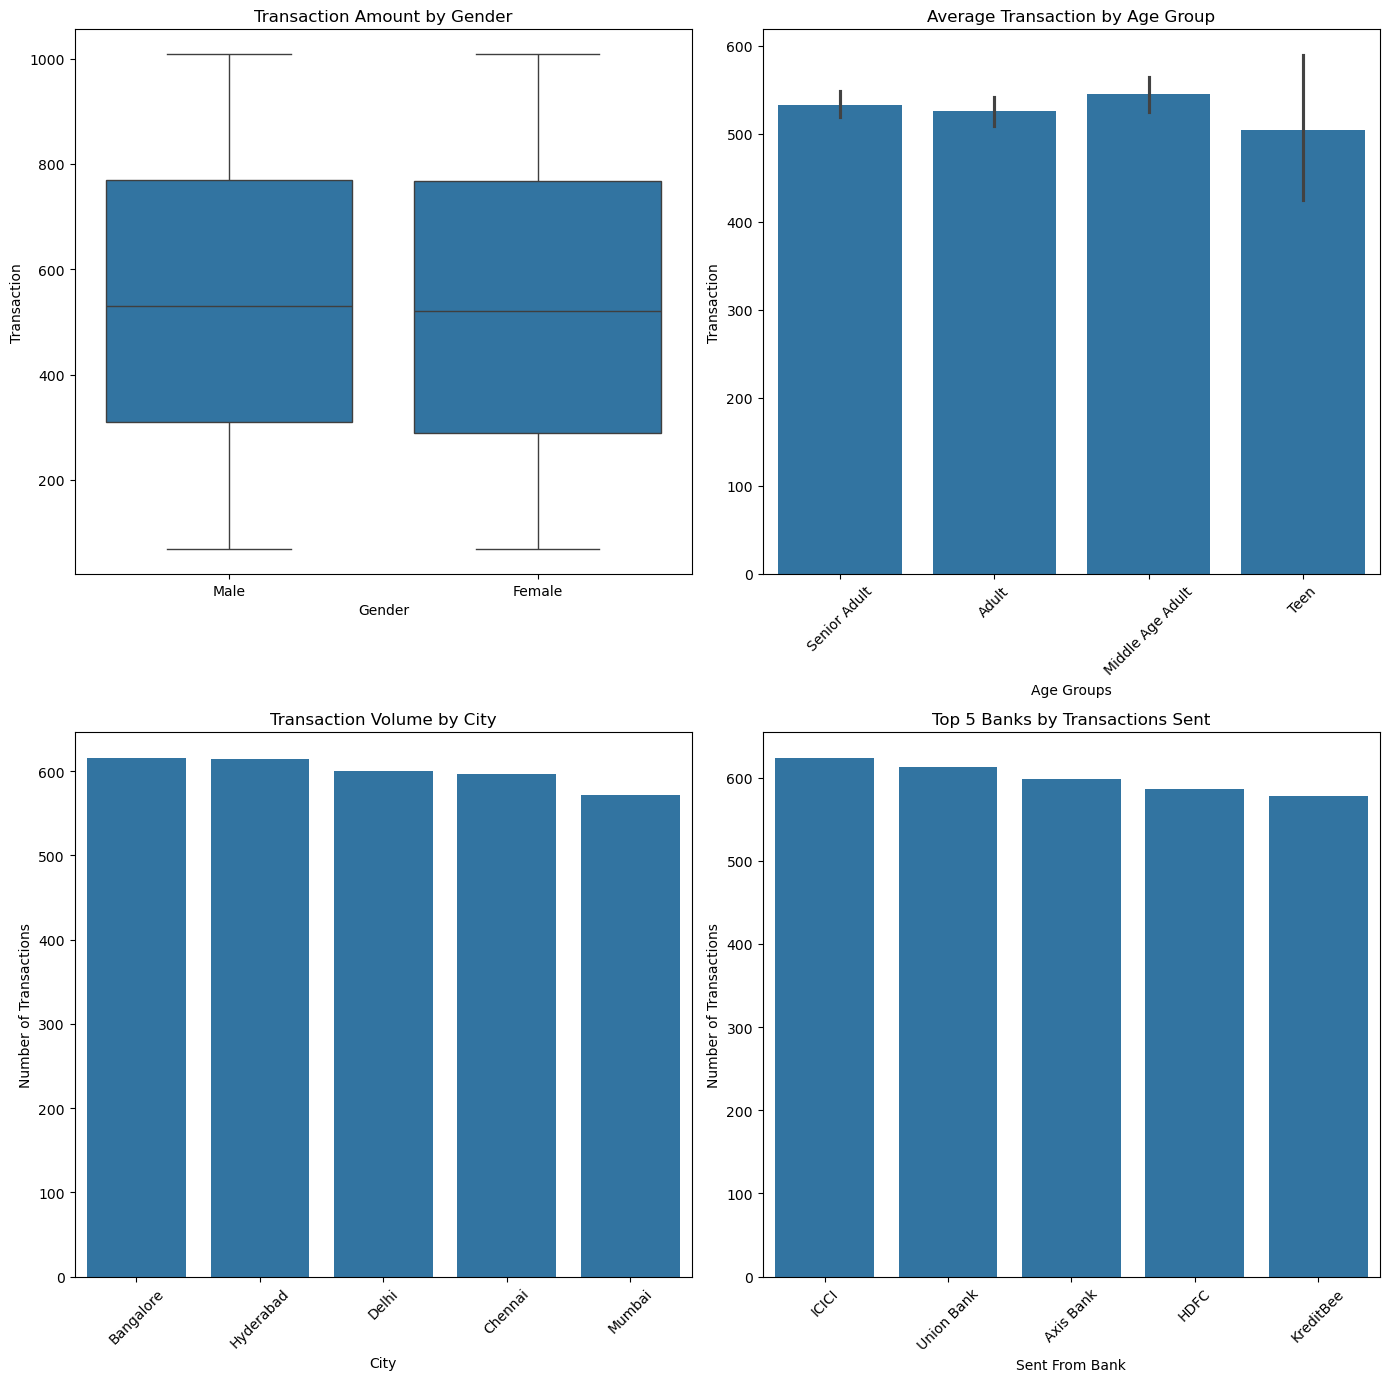

In [46]:
# Ploting through visuallization
plt.figure(figsize=(14, 20))

# 1. Transaction Amount by Gender
plt.subplot(3, 2, 1)
sns.boxplot(x="Gender", y="Transaction", data=df)
plt.title("Transaction Amount by Gender")

# 2. Average Transaction by Age Group 
plt.subplot(3, 2, 2)
sns.barplot(x="Age Groups", y="Transaction", data=df, estimator=np.mean)
plt.title("Average Transaction by Age Group")
plt.xticks(rotation=45)

# 3. Transaction Volume by City
plt.subplot(3, 2, 3)
city_counts = df['City'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title("Transaction Volume by City")
plt.xticks(rotation=45)
plt.ylabel("Number of Transactions")

# 4. Top 5 Banks by Number of Transactions Sent
plt.subplot(3, 2, 4)
top_banks = df['Sent From Bank'].value_counts().head(5)
sns.barplot(x=top_banks.index, y=top_banks.values)
plt.title("Top 5 Banks by Transactions Sent")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Total Transactions by Sending Bank

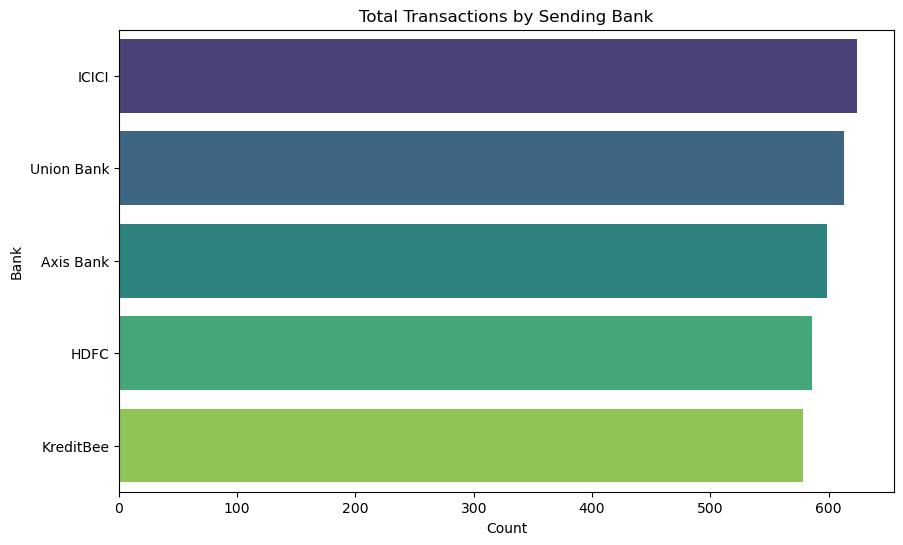

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Sent From Bank', data=df, order=df['Sent From Bank'].value_counts().index, palette='viridis')
plt.title('Total Transactions by Sending Bank')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.show()

#### Average Transaction by Gender

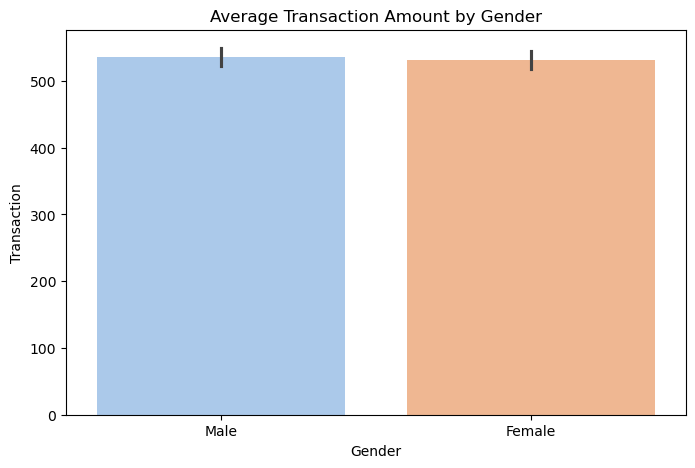

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Transaction', data=df, palette='pastel')
plt.title('Average Transaction Amount by Gender')
plt.show()

#### Monthly Transaction by Volume

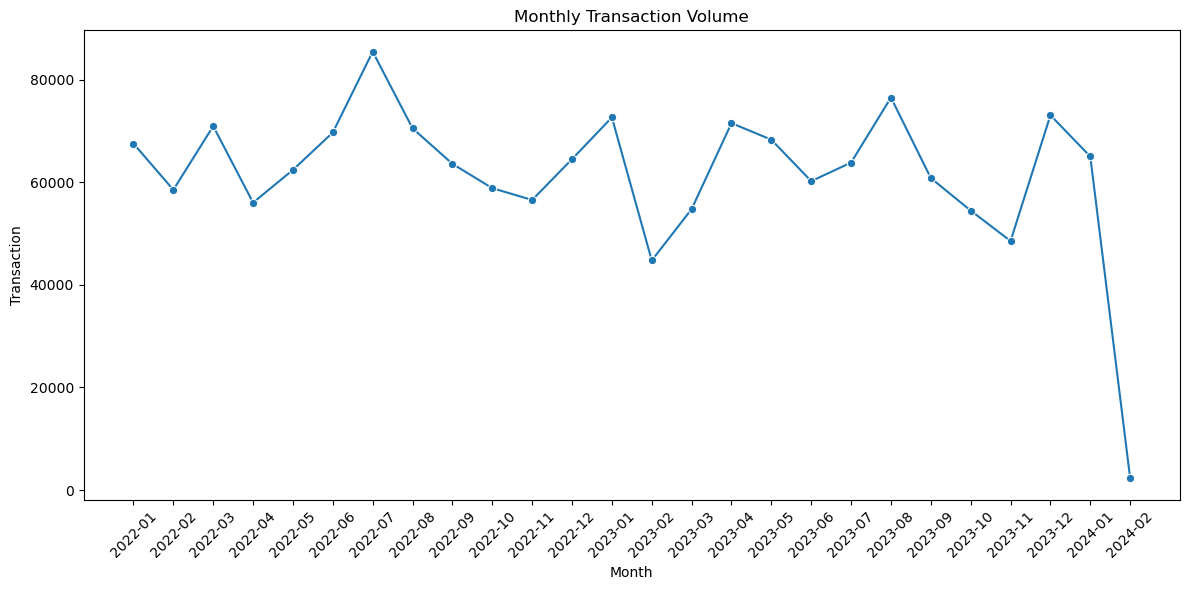

In [49]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_transactions = df.groupby('Month')['Transaction'].sum().reset_index()
monthly_transactions['Month'] = monthly_transactions['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Transaction', data=monthly_transactions, marker='o')
plt.title('Monthly Transaction Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

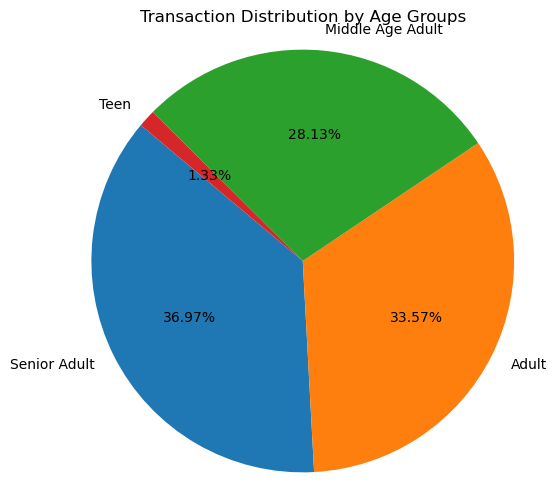

In [50]:
# Count transactions by Age Groups
age_group_counts = df['Age Groups'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Transaction Distribution by Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

#### Data Visualization

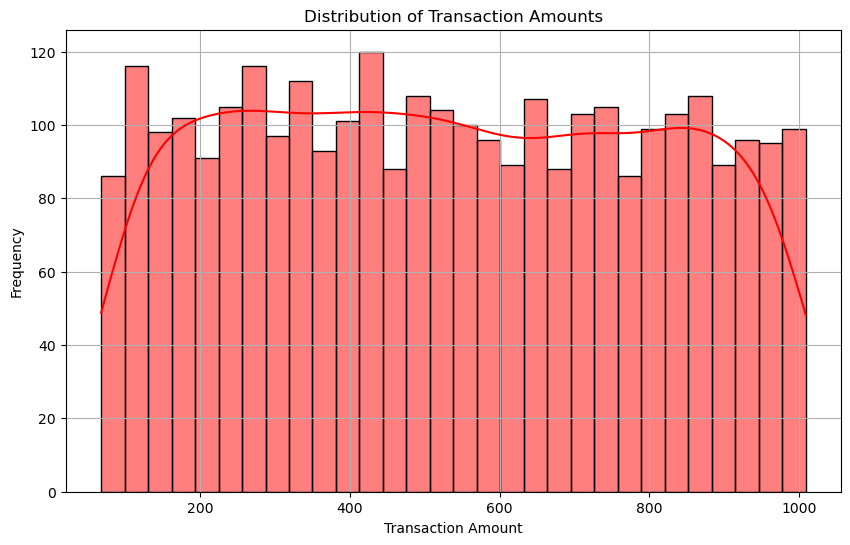

In [51]:
# distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

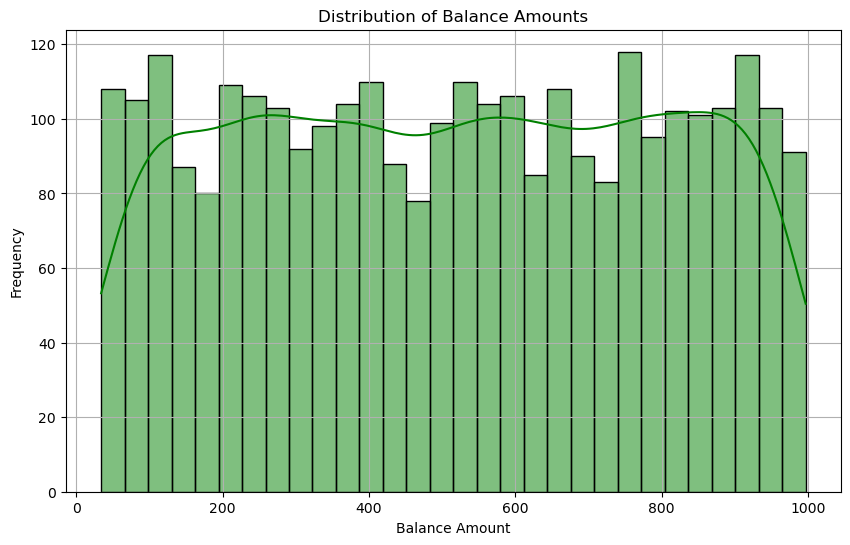

In [52]:
# in this plot we am observe the distribution of balance amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Balance Amounts')
plt.xlabel('Balance Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

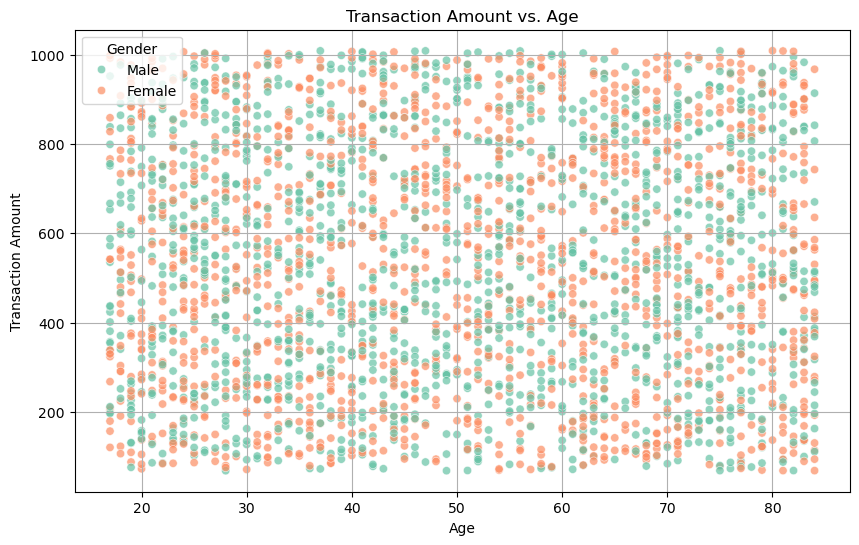

In [53]:
# visualzing the scattre plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Transaction', hue='Gender', palette='Set2', alpha=0.7)
plt.title('Transaction Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

#### The scatter plot shows that transaction amounts vary widely across ages, with no strong correlation, but male and female customers are fairly evenly distributed across the age spectrum.

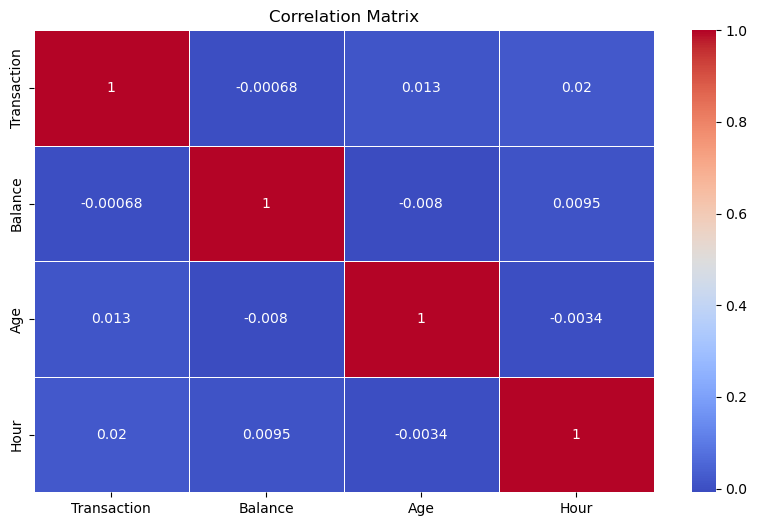

In [54]:
plt.figure(figsize=(10, 6))
corr = df[['Transaction', 'Balance', 'Age', 'Hour']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### The heatmap shows a weak positive correlation between Transaction and Age, and a slightly stronger correlation between Balance and Transaction, suggesting older users may spend more, but the relationships are generally weak.

In [57]:
df = df.to_csv('cleaned_data_UpiT.csv', index=False)